In [85]:
import tensorflow as tf
from tensorflow import keras

import os
import tempfile

import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import pickle

import sklearn
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [10]:
mpl.rcParams['figure.figsize'] = (12, 10)
colors = plt.rcParams['axes.prop_cycle'].by_key()['color']

In [11]:
dataset = pickle.load(open("All data.pkl","rb"))

In [12]:
dataset.head()

,sku,national_inv,lead_time,in_transit_qty,forecast_3_month,forecast_6_month,forecast_9_month,sales_1_month,sales_3_month,sales_6_month,...,pieces_past_due,perf_6_month_avg,perf_12_month_avg,local_bo_qty,deck_risk,oe_constraint,ppap_risk,stop_auto_buy,rev_stop,went_on_backorder
0,1026827,0.0,8.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.85,0.83,0.0,0,0,0,0,0,0
1,1043384,2.0,9.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.99,0.99,0.0,0,0,0,0,0,0
2,1043696,2.0,8.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.85,0.83,0.0,1,0,0,0,0,0
3,1043852,7.0,8.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.10,0.13,0.0,0,0,0,0,0,0
4,1044048,8.0,8.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.85,0.83,0.0,1,0,0,0,0,0


In [13]:
dataset.describe()

,national_inv,lead_time,in_transit_qty,forecast_3_month,forecast_6_month,forecast_9_month,sales_1_month,sales_3_month,sales_6_month,sales_9_month,...,pieces_past_due,perf_6_month_avg,perf_12_month_avg,local_bo_qty,deck_risk,oe_constraint,ppap_risk,stop_auto_buy,rev_stop,went_on_backorder
count,1.929935e+06,1.929935e+06,1.929935e+06,1.929935e+06,1.929935e+06,1.929935e+06,1.929935e+06,1.929935e+06,1.929935e+06,1.929935e+06,...,1.929935e+06,1.929935e+06,1.929935e+06,1.929935e+06,1.929935e+06,1.929935e+06,1.929935e+06,1.929935e+06,1.929935e+06,1.929935e+06
mean,4.965683e+02,7.885898e+00,4.306440e+01,1.785399e+02,3.454659e+02,5.066067e+02,5.536816e+01,1.746639e+02,3.415653e+02,5.235771e+02,...,2.016193e+00,7.872355e-01,7.807485e-01,6.537039e-01,2.256309e-01,1.513004e-04,1.204973e-01,3.655253e-02,4.347297e-04,7.244285e-03
std,2.957343e+04,6.839711e+00,1.295420e+03,5.108770e+03,9.831562e+03,1.434543e+04,1.884377e+03,5.188856e+03,9.585030e+03,1.473327e+04,...,2.296112e+02,2.286765e-01,2.225948e-01,3.543230e+01,4.179972e-01,1.229950e-02,3.255423e-01,1.876605e-01,2.084564e-02,8.480454e-02
min,-2.725600e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,4.000000e+00,4.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,7.300000e-01,7.200000e-01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,1.500000e+01,8.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,2.000000e+00,4.000000e+00,...,0.000000e+00,8.500000e-01,8.300000e-01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
75%,8.000000e+01,8.000000e+00,0.000000e+00,4.000000e+00,1.200000e+01,2.000000e+01,4.000000e+00,1.500000e+01,3.100000e+01,4.700000e+01,...,0.000000e+00,9.600000e-01,9.500000e-01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
max,1.233440e+07,5.200000e+01,4.894080e+05,1.510592e+06,2.461360e+06,3.777304e+06,7.417740e+05,1.105478e+06,2.146625e+06,3.205172e+06,...,1.464960e+05,1.000000e+00,1.000000e+00,1.253000e+04,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00


### Examining Class Imbalace

In [14]:
neg, pos = np.bincount(dataset['went_on_backorder'])
total = neg + pos
print('Examples:\n    Total: {}\n    Positive: {} ({:.2f}% of total)\n'.format(
    total, pos, 100 * pos / total))

Examples:
    Total: 1929935
    Positive: 13981 (0.72% of total)



In [16]:
cleaned_df = dataset.copy()
cleaned_df.drop('sku',axis=1,inplace=True)


In [17]:
# Use a utility from sklearn to split and shuffle our dataset.
train_df, test_df = train_test_split(cleaned_df, test_size=0.2)
train_df, val_df = train_test_split(train_df, test_size=0.2)

# Form np arrays of labels and features.
train_labels = np.array(train_df.pop('went_on_backorder'))
bool_train_labels = train_labels != 0
val_labels = np.array(val_df.pop('went_on_backorder'))
test_labels = np.array(test_df.pop('went_on_backorder'))

train_features = np.array(train_df)
val_features = np.array(val_df)
test_features = np.array(test_df)

In [19]:
scaler = StandardScaler()
train_features = scaler.fit_transform(train_features)
pickle.dump(scaler,open("scaler_deep.pkl","wb"))

val_features = scaler.transform(val_features)
test_features = scaler.transform(test_features)

train_features = np.clip(train_features, -5, 5)
val_features = np.clip(val_features, -5, 5)
test_features = np.clip(test_features, -5, 5)


print('Training labels shape:', train_labels.shape)
print('Validation labels shape:', val_labels.shape)
print('Test labels shape:', test_labels.shape)

print('Training features shape:', train_features.shape)
print('Validation features shape:', val_features.shape)
print('Test features shape:', test_features.shape)


Training labels shape: (1235158,)
Validation labels shape: (308790,)
Test labels shape: (385987,)
Training features shape: (1235158, 21)
Validation features shape: (308790, 21)
Test features shape: (385987, 21)


In [20]:
train_df.columns

Index(['national_inv', 'lead_time', 'in_transit_qty', 'forecast_3_month',
       'forecast_6_month', 'forecast_9_month', 'sales_1_month',
       'sales_3_month', 'sales_6_month', 'sales_9_month', 'min_bank',
       'potential_issue', 'pieces_past_due', 'perf_6_month_avg',
       'perf_12_month_avg', 'local_bo_qty', 'deck_risk', 'oe_constraint',
       'ppap_risk', 'stop_auto_buy', 'rev_stop'],
      dtype='object')

### Look at the data distribution
Next compare the distributions of the positive and negative examples over a few features

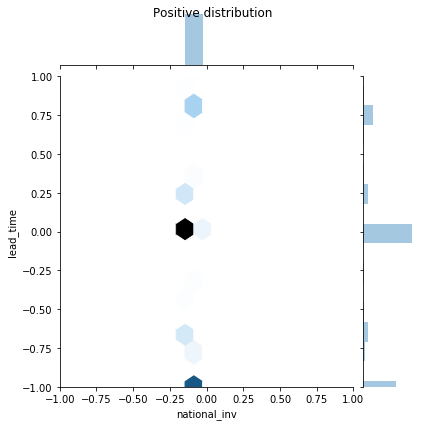

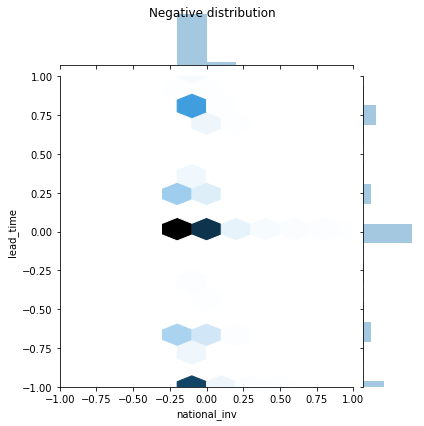

In [26]:
pos_df = pd.DataFrame(train_features[ bool_train_labels], columns = train_df.columns)
neg_df = pd.DataFrame(train_features[~bool_train_labels], columns = train_df.columns)

sns.jointplot(pos_df['national_inv'], pos_df['lead_time'],
              kind='hex',xlim = (-1,1), ylim = (-1,1))
plt.suptitle("Positive distribution")

sns.jointplot(neg_df['national_inv'], neg_df['lead_time'],
              kind='hex',xlim = (-1,1), ylim = (-1,1))
_ = plt.suptitle("Negative distribution")

In [27]:
# Define model and metrics


In [84]:
METRICS = [
      keras.metrics.TruePositives(name='tp'),
      keras.metrics.FalsePositives(name='fp'),
      keras.metrics.TrueNegatives(name='tn'),
      keras.metrics.FalseNegatives(name='fn'), 
      keras.metrics.BinaryAccuracy(name='accuracy'),
      keras.metrics.Precision(name='precision'),
      keras.metrics.Recall(name='recall'),
      keras.metrics.AUC(name='auc')
]

def make_model(metrics = METRICS, output_bias=None):
  if output_bias is not None:
    output_bias = tf.keras.initializers.Constant(output_bias)
  model = keras.Sequential([
      keras.layers.Dense(
          16, activation='relu',
          input_shape=(train_features.shape[-1],)),
      keras.layers.Dropout(0.5),
      keras.layers.Dense(1, activation='sigmoid',
                         bias_initializer=output_bias),
  ])

  model.compile(
      optimizer=keras.optimizers.Adam(lr=1e-3),
      loss=keras.losses.BinaryCrossentropy(),
      metrics=metrics)

  return model

AttributeError: module 'tensorflow._api.v1.keras.metrics' has no attribute 'AUC'

In [33]:
EPOCHS = 100
BATCH_SIZE = 2048

early_stopping = tf.keras.callbacks.EarlyStopping(
    monitor='val_auc', 
    verbose=1,
    patience=10,
    mode='max',
    restore_best_weights=True)

In [34]:
model = make_model()
model.summary()

Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
Instructions for updating:
Use tf.cast instead.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 16)                352       
_________________________________________________________________
dropout (Dropout)            (None, 16)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 17        
Total params: 369
Trainable params: 369
Non-trainable params: 0
_________________________________________________________________


In [39]:
model.predict(train_features[:21])

array([[0.40836486],
       [0.3768109 ],
       [0.52787197],
       [0.4849823 ],
       [0.4246962 ],
       [0.48279488],
       [0.45196888],
       [0.34922475],
       [0.43205002],
       [0.47868794],
       [0.3976111 ],
       [0.48005998],
       [0.40940732],
       [0.43201697],
       [0.451032  ],
       [0.41872668],
       [0.45848826],
       [0.39754355],
       [0.51569295],
       [0.40591893],
       [0.509037  ]], dtype=float32)

In [41]:
results = model.evaluate(train_features, train_labels, batch_size=BATCH_SIZE, verbose=0)
print("Loss: {:0.4f}".format(results[0]))

Loss: 0.5470


In [42]:
initial_bias = np.log([pos/neg])
initial_bias

array([-4.92027168])

In [47]:
model = make_model(output_bias = initial_bias)
model.predict(train_features[:21])

array([[0.00732407],
       [0.0094063 ],
       [0.00821996],
       [0.01811877],
       [0.00799668],
       [0.01817223],
       [0.00823653],
       [0.03965706],
       [0.00771517],
       [0.01006696],
       [0.00741997],
       [0.01002142],
       [0.00718737],
       [0.00779143],
       [0.00893545],
       [0.00849608],
       [0.00863847],
       [0.00723118],
       [0.00779831],
       [0.0116871 ],
       [0.00792938]], dtype=float32)

In [48]:
results = model.evaluate(train_features, train_labels, batch_size=BATCH_SIZE, verbose=0)
print("Loss: {:0.4f}".format(results[0]))

Loss: 0.0514


This initial loss is about 50 times less than if would have been with naive initilization.

This way the model doesn't need to spend the first few epochs just learning that positive examples are unlikely

In [49]:
initial_weights = os.path.join(tempfile.mkdtemp(),'initial_weights')
model.save_weights(initial_weights)


Consider using a TensorFlow optimizer from `tf.train`.
Instructions for updating:
Use tf.train.CheckpointManager to manage checkpoints rather than manually editing the Checkpoint proto.


In [50]:
model = make_model()
model.load_weights(initial_weights)
model.layers[-1].bias.assign([0.0])
zero_bias_history = model.fit(
    train_features,
    train_labels,
    batch_size=BATCH_SIZE,
    epochs=20,
    validation_data=(val_features, val_labels), 
    verbose=0)

Instructions for updating:
Use tf.cast instead.


In [51]:
model = make_model()
model.load_weights(initial_weights)
careful_bias_history = model.fit(
    train_features,
    train_labels,
    batch_size=BATCH_SIZE,
    epochs=20,
    validation_data=(val_features, val_labels), 
    verbose=0)

In [52]:
def plot_loss(history, label, n):
  # Use a log scale to show the wide range of values.
  plt.semilogy(history.epoch,  history.history['loss'],
               color=colors[n], label='Train '+label)
  plt.semilogy(history.epoch,  history.history['val_loss'],
          color=colors[n], label='Val '+label,
          linestyle="--")
  plt.xlabel('Epoch')
  plt.ylabel('Loss')
  
  plt.legend()

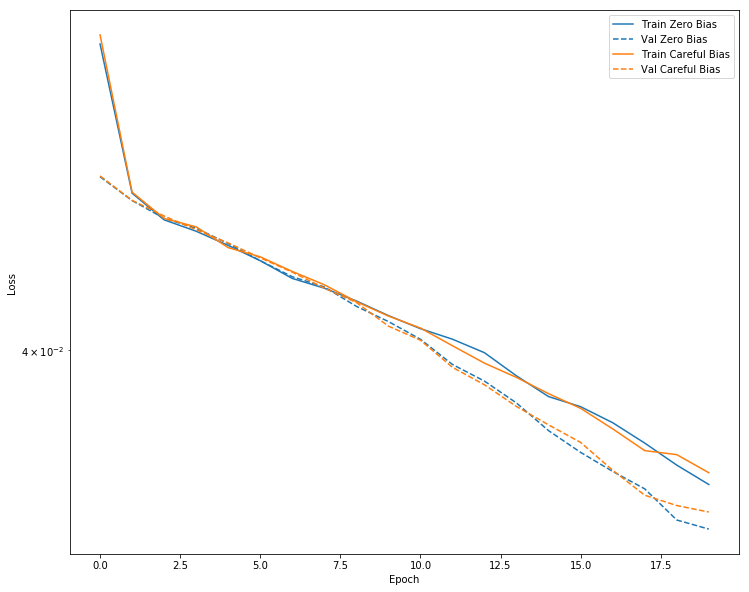

In [53]:
plot_loss(zero_bias_history, "Zero Bias", 0)
plot_loss(careful_bias_history, "Careful Bias", 1)

The above figure makes it clear: In terms of validation loss, on this problem, this careful initialization gives a clear advantage.

### Train the model

In [54]:
model = make_model()
model.load_weights(initial_weights)
baseline_history = model.fit(
    train_features,
    train_labels,
    batch_size=BATCH_SIZE,
    epochs=EPOCHS,
    callbacks = [early_stopping],
    validation_data=(val_features, val_labels))

Train on 1235158 samples, validate on 308790 samples
Epoch 1/100
1235158/1235158 [==============================] - 8s 6us/sample - loss: 0.0436 - tp: 9.0000 - fp: 298.0000 - tn: 1225889.0000 - fn: 8962.0000 - accuracy: 0.9925 - precision: 0.0293 - recall: 0.0010 - val_loss: 0.0420 - val_tp: 0.0000e+00 - val_fp: 0.0000e+00 - val_tn: 306513.0000 - val_fn: 2277.0000 - val_accuracy: 0.9926 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00
Epoch 2/100
1235158/1235158 [==============================] - 7s 6us/sample - loss: 0.0418 - tp: 10.0000 - fp: 31.0000 - tn: 1226156.0000 - fn: 8961.0000 - accuracy: 0.9927 - precision: 0.2439 - recall: 0.0011 - val_loss: 0.0417 - val_tp: 0.0000e+00 - val_fp: 0.0000e+00 - val_tn: 306513.0000 - val_fn: 2277.0000 - val_accuracy: 0.9926 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00
Epoch 3/100
1235158/1235158 [==============================] - 8s 6us/sample - loss: 0.0415 - tp: 10.0000 - fp: 37.0000 - tn: 1226150.0000 - fn: 8961.0000 - accuracy: 

Epoch 11/100
1235158/1235158 [==============================] - 9s 8us/sample - loss: 0.0403 - tp: 26.0000 - fp: 67.0000 - tn: 1226120.0000 - fn: 8945.0000 - accuracy: 0.9927 - precision: 0.2796 - recall: 0.0029 - val_loss: 0.0401 - val_tp: 2.0000 - val_fp: 18.0000 - val_tn: 306495.0000 - val_fn: 2275.0000 - val_accuracy: 0.9926 - val_precision: 0.1000 - val_recall: 8.7835e-04
Epoch 12/100
1235158/1235158 [==============================] - 7s 6us/sample - loss: 0.0401 - tp: 23.0000 - fp: 71.0000 - tn: 1226116.0000 - fn: 8948.0000 - accuracy: 0.9927 - precision: 0.2447 - recall: 0.0026 - val_loss: 0.0399 - val_tp: 1.0000 - val_fp: 10.0000 - val_tn: 306503.0000 - val_fn: 2276.0000 - val_accuracy: 0.9926 - val_precision: 0.0909 - val_recall: 4.3917e-04
Epoch 13/100
1235158/1235158 [==============================] - 8s 7us/sample - loss: 0.0399 - tp: 19.0000 - fp: 64.0000 - tn: 1226123.0000 - fn: 8952.0000 - accuracy: 0.9927 - precision: 0.2289 - recall: 0.0021 - val_loss: 0.0397 - val_tp:

1235158/1235158 [==============================] - 7s 6us/sample - loss: 0.0386 - tp: 27.0000 - fp: 65.0000 - tn: 1226122.0000 - fn: 8944.0000 - accuracy: 0.9927 - precision: 0.2935 - recall: 0.0030 - val_loss: 0.0379 - val_tp: 1.0000 - val_fp: 12.0000 - val_tn: 306501.0000 - val_fn: 2276.0000 - val_accuracy: 0.9926 - val_precision: 0.0769 - val_recall: 4.3917e-04
Epoch 22/100
1235158/1235158 [==============================] - 7s 6us/sample - loss: 0.0384 - tp: 19.0000 - fp: 68.0000 - tn: 1226119.0000 - fn: 8952.0000 - accuracy: 0.9927 - precision: 0.2184 - recall: 0.0021 - val_loss: 0.0377 - val_tp: 1.0000 - val_fp: 9.0000 - val_tn: 306504.0000 - val_fn: 2276.0000 - val_accuracy: 0.9926 - val_precision: 0.1000 - val_recall: 4.3917e-04
Epoch 23/100
1235158/1235158 [==============================] - 8s 6us/sample - loss: 0.0383 - tp: 20.0000 - fp: 71.0000 - tn: 1226116.0000 - fn: 8951.0000 - accuracy: 0.9927 - precision: 0.2198 - recall: 0.0022 - val_loss: 0.0375 - val_tp: 1.0000 - val_

Epoch 31/100
1235158/1235158 [==============================] - 8s 6us/sample - loss: 0.0374 - tp: 25.0000 - fp: 64.0000 - tn: 1226123.0000 - fn: 8946.0000 - accuracy: 0.9927 - precision: 0.2809 - recall: 0.0028 - val_loss: 0.0364 - val_tp: 2.0000 - val_fp: 12.0000 - val_tn: 306501.0000 - val_fn: 2275.0000 - val_accuracy: 0.9926 - val_precision: 0.1429 - val_recall: 8.7835e-04
Epoch 32/100
1235158/1235158 [==============================] - 7s 6us/sample - loss: 0.0373 - tp: 14.0000 - fp: 61.0000 - tn: 1226126.0000 - fn: 8957.0000 - accuracy: 0.9927 - precision: 0.1867 - recall: 0.0016 - val_loss: 0.0363 - val_tp: 2.0000 - val_fp: 14.0000 - val_tn: 306499.0000 - val_fn: 2275.0000 - val_accuracy: 0.9926 - val_precision: 0.1250 - val_recall: 8.7835e-04
Epoch 33/100
1235158/1235158 [==============================] - 7s 6us/sample - loss: 0.0371 - tp: 22.0000 - fp: 60.0000 - tn: 1226127.0000 - fn: 8949.0000 - accuracy: 0.9927 - precision: 0.2683 - recall: 0.0025 - val_loss: 0.0363 - val_tp:

1235158/1235158 [==============================] - 6s 5us/sample - loss: 0.0366 - tp: 22.0000 - fp: 48.0000 - tn: 1226139.0000 - fn: 8949.0000 - accuracy: 0.9927 - precision: 0.3143 - recall: 0.0025 - val_loss: 0.0355 - val_tp: 1.0000 - val_fp: 11.0000 - val_tn: 306502.0000 - val_fn: 2276.0000 - val_accuracy: 0.9926 - val_precision: 0.0833 - val_recall: 4.3917e-04
Epoch 42/100
1235158/1235158 [==============================] - 7s 5us/sample - loss: 0.0364 - tp: 20.0000 - fp: 56.0000 - tn: 1226131.0000 - fn: 8951.0000 - accuracy: 0.9927 - precision: 0.2632 - recall: 0.0022 - val_loss: 0.0352 - val_tp: 1.0000 - val_fp: 9.0000 - val_tn: 306504.0000 - val_fn: 2276.0000 - val_accuracy: 0.9926 - val_precision: 0.1000 - val_recall: 4.3917e-04
Epoch 43/100
1235158/1235158 [==============================] - 6s 5us/sample - loss: 0.0365 - tp: 18.0000 - fp: 51.0000 - tn: 1226136.0000 - fn: 8953.0000 - accuracy: 0.9927 - precision: 0.2609 - recall: 0.0020 - val_loss: 0.0355 - val_tp: 1.0000 - val_

1235158/1235158 [==============================] - 7s 6us/sample - loss: 0.0360 - tp: 19.0000 - fp: 52.0000 - tn: 1226135.0000 - fn: 8952.0000 - accuracy: 0.9927 - precision: 0.2676 - recall: 0.0021 - val_loss: 0.0351 - val_tp: 1.0000 - val_fp: 10.0000 - val_tn: 306503.0000 - val_fn: 2276.0000 - val_accuracy: 0.9926 - val_precision: 0.0909 - val_recall: 4.3917e-04
Epoch 52/100
1235158/1235158 [==============================] - 7s 6us/sample - loss: 0.0360 - tp: 22.0000 - fp: 60.0000 - tn: 1226127.0000 - fn: 8949.0000 - accuracy: 0.9927 - precision: 0.2683 - recall: 0.0025 - val_loss: 0.0349 - val_tp: 1.0000 - val_fp: 8.0000 - val_tn: 306505.0000 - val_fn: 2276.0000 - val_accuracy: 0.9926 - val_precision: 0.1111 - val_recall: 4.3917e-04
Epoch 53/100
1235158/1235158 [==============================] - 7s 6us/sample - loss: 0.0359 - tp: 16.0000 - fp: 52.0000 - tn: 1226135.0000 - fn: 8955.0000 - accuracy: 0.9927 - precision: 0.2353 - recall: 0.0018 - val_loss: 0.0348 - val_tp: 1.0000 - val_

1235158/1235158 [==============================] - 6s 5us/sample - loss: 0.0357 - tp: 23.0000 - fp: 57.0000 - tn: 1226130.0000 - fn: 8948.0000 - accuracy: 0.9927 - precision: 0.2875 - recall: 0.0026 - val_loss: 0.0346 - val_tp: 1.0000 - val_fp: 8.0000 - val_tn: 306505.0000 - val_fn: 2276.0000 - val_accuracy: 0.9926 - val_precision: 0.1111 - val_recall: 4.3917e-04
Epoch 62/100
1235158/1235158 [==============================] - 7s 6us/sample - loss: 0.0357 - tp: 13.0000 - fp: 42.0000 - tn: 1226145.0000 - fn: 8958.0000 - accuracy: 0.9927 - precision: 0.2364 - recall: 0.0014 - val_loss: 0.0342 - val_tp: 2.0000 - val_fp: 15.0000 - val_tn: 306498.0000 - val_fn: 2275.0000 - val_accuracy: 0.9926 - val_precision: 0.1176 - val_recall: 8.7835e-04
Epoch 63/100
1235158/1235158 [==============================] - 8s 6us/sample - loss: 0.0356 - tp: 21.0000 - fp: 51.0000 - tn: 1226136.0000 - fn: 8950.0000 - accuracy: 0.9927 - precision: 0.2917 - recall: 0.0023 - val_loss: 0.0344 - val_tp: 1.0000 - val_

1235158/1235158 [==============================] - 8s 6us/sample - loss: 0.0355 - tp: 20.0000 - fp: 55.0000 - tn: 1226132.0000 - fn: 8951.0000 - accuracy: 0.9927 - precision: 0.2667 - recall: 0.0022 - val_loss: 0.0340 - val_tp: 1.0000 - val_fp: 10.0000 - val_tn: 306503.0000 - val_fn: 2276.0000 - val_accuracy: 0.9926 - val_precision: 0.0909 - val_recall: 4.3917e-04
Epoch 72/100
1235158/1235158 [==============================] - 8s 6us/sample - loss: 0.0354 - tp: 17.0000 - fp: 39.0000 - tn: 1226148.0000 - fn: 8954.0000 - accuracy: 0.9927 - precision: 0.3036 - recall: 0.0019 - val_loss: 0.0341 - val_tp: 2.0000 - val_fp: 9.0000 - val_tn: 306504.0000 - val_fn: 2275.0000 - val_accuracy: 0.9926 - val_precision: 0.1818 - val_recall: 8.7835e-04
Epoch 73/100
1235158/1235158 [==============================] - 6s 5us/sample - loss: 0.0354 - tp: 22.0000 - fp: 47.0000 - tn: 1226140.0000 - fn: 8949.0000 - accuracy: 0.9927 - precision: 0.3188 - recall: 0.0025 - val_loss: 0.0340 - val_tp: 1.0000 - val_

Epoch 81/100
1235158/1235158 [==============================] - 10s 8us/sample - loss: 0.0352 - tp: 19.0000 - fp: 49.0000 - tn: 1226138.0000 - fn: 8952.0000 - accuracy: 0.9927 - precision: 0.2794 - recall: 0.0021 - val_loss: 0.0340 - val_tp: 1.0000 - val_fp: 10.0000 - val_tn: 306503.0000 - val_fn: 2276.0000 - val_accuracy: 0.9926 - val_precision: 0.0909 - val_recall: 4.3917e-04
Epoch 82/100
1235158/1235158 [==============================] - 10s 8us/sample - loss: 0.0351 - tp: 20.0000 - fp: 53.0000 - tn: 1226134.0000 - fn: 8951.0000 - accuracy: 0.9927 - precision: 0.2740 - recall: 0.0022 - val_loss: 0.0340 - val_tp: 1.0000 - val_fp: 6.0000 - val_tn: 306507.0000 - val_fn: 2276.0000 - val_accuracy: 0.9926 - val_precision: 0.1429 - val_recall: 4.3917e-04
Epoch 83/100
1235158/1235158 [==============================] - 10s 8us/sample - loss: 0.0352 - tp: 20.0000 - fp: 51.0000 - tn: 1226136.0000 - fn: 8951.0000 - accuracy: 0.9927 - precision: 0.2817 - recall: 0.0022 - val_loss: 0.0338 - val_t

1235158/1235158 [==============================] - 8s 7us/sample - loss: 0.0352 - tp: 16.0000 - fp: 53.0000 - tn: 1226134.0000 - fn: 8955.0000 - accuracy: 0.9927 - precision: 0.2319 - recall: 0.0018 - val_loss: 0.0336 - val_tp: 1.0000 - val_fp: 6.0000 - val_tn: 306507.0000 - val_fn: 2276.0000 - val_accuracy: 0.9926 - val_precision: 0.1429 - val_recall: 4.3917e-04
Epoch 91/100
1235158/1235158 [==============================] - 9s 7us/sample - loss: 0.0352 - tp: 20.0000 - fp: 49.0000 - tn: 1226138.0000 - fn: 8951.0000 - accuracy: 0.9927 - precision: 0.2899 - recall: 0.0022 - val_loss: 0.0339 - val_tp: 1.0000 - val_fp: 6.0000 - val_tn: 306507.0000 - val_fn: 2276.0000 - val_accuracy: 0.9926 - val_precision: 0.1429 - val_recall: 4.3917e-04
Epoch 92/100
1235158/1235158 [==============================] - 9s 8us/sample - loss: 0.0351 - tp: 22.0000 - fp: 38.0000 - tn: 1226149.0000 - fn: 8949.0000 - accuracy: 0.9927 - precision: 0.3667 - recall: 0.0025 - val_loss: 0.0335 - val_tp: 1.0000 - val_f

1235158/1235158 [==============================] - 8s 6us/sample - loss: 0.0350 - tp: 19.0000 - fp: 41.0000 - tn: 1226146.0000 - fn: 8952.0000 - accuracy: 0.9927 - precision: 0.3167 - recall: 0.0021 - val_loss: 0.0338 - val_tp: 2.0000 - val_fp: 13.0000 - val_tn: 306500.0000 - val_fn: 2275.0000 - val_accuracy: 0.9926 - val_precision: 0.1333 - val_recall: 8.7835e-04


### Check training history

In [55]:
def plot_metrics(history):
  metrics =  ['loss', 'precision', 'recall']
  for n, metric in enumerate(metrics):
    name = metric.replace("_"," ").capitalize()
    plt.subplot(2,2,n+1)
    plt.plot(history.epoch,  history.history[metric], color=colors[0], label='Train')
    plt.plot(history.epoch, history.history['val_'+metric],
             color=colors[0], linestyle="--", label='Val')
    plt.xlabel('Epoch')
    plt.ylabel(name)
    if metric == 'loss':
      plt.ylim([0, plt.ylim()[1]])
    elif metric == 'auc':
      plt.ylim([0.8,1])
    else:
      plt.ylim([0,1])

    plt.legend()

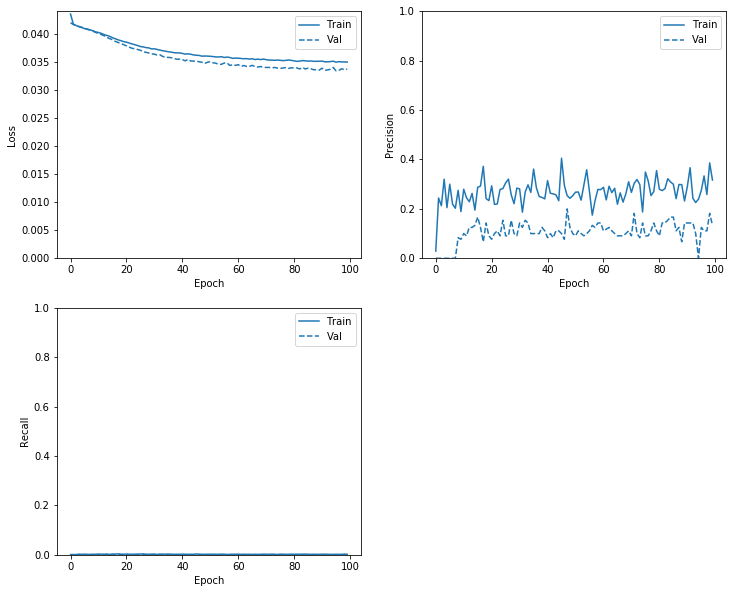

In [56]:
plot_metrics(baseline_history)

In [57]:
train_predictions_baseline = model.predict(train_features, batch_size=BATCH_SIZE)
test_predictions_baseline = model.predict(test_features, batch_size=BATCH_SIZE)

In [58]:
def plot_cm(labels, predictions, p=0.5):
  cm = confusion_matrix(labels, predictions > p)
  plt.figure(figsize=(5,5))
  sns.heatmap(cm, annot=True, fmt="d")
  plt.title('Confusion matrix @{:.2f}'.format(p))
  plt.ylabel('Actual label')
  plt.xlabel('Predicted label')

  print('Legitimate Transactions Detected (True Negatives): ', cm[0][0])
  print('Legitimate Transactions Incorrectly Detected (False Positives): ', cm[0][1])
  print('Fraudulent Transactions Missed (False Negatives): ', cm[1][0])
  print('Fraudulent Transactions Detected (True Positives): ', cm[1][1])
  print('Total Fraudulent Transactions: ', np.sum(cm[1]))

Evaluate your model on the test dataset and display the results for the metrics

loss :  0.03262208066971715
tp :  1.0
fp :  7.0
tn :  383247.0
fn :  2732.0
accuracy :  0.9929039
precision :  0.125
recall :  0.00036589828

Legitimate Transactions Detected (True Negatives):  383247
Legitimate Transactions Incorrectly Detected (False Positives):  7
Fraudulent Transactions Missed (False Negatives):  2732
Fraudulent Transactions Detected (True Positives):  1
Total Fraudulent Transactions:  2733


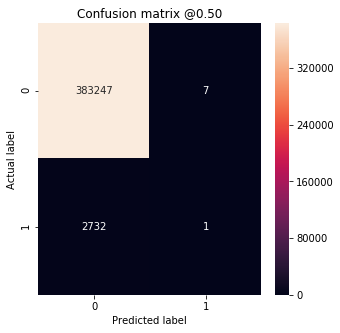

In [59]:
baseline_results = model.evaluate(test_features, test_labels,
                                  batch_size=BATCH_SIZE, verbose=0)
for name, value in zip(model.metrics_names, baseline_results):
  print(name, ': ', value)
print()

plot_cm(test_labels, test_predictions_baseline)

In [60]:
def plot_roc(name, labels, predictions, **kwargs):
  fp, tp, _ = sklearn.metrics.roc_curve(labels, predictions)

  plt.plot(100*fp, 100*tp, label=name, linewidth=2, **kwargs)
  plt.xlabel('False positives [%]')
  plt.ylabel('True positives [%]')
  plt.xlim([-0.5,20])
  plt.ylim([80,100.5])
  plt.grid(True)
  ax = plt.gca()
  ax.set_aspect('equal')

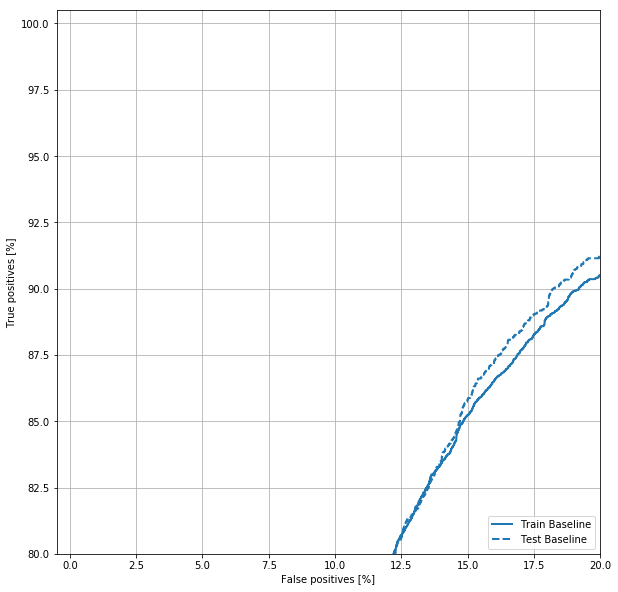

In [61]:
plot_roc("Train Baseline", train_labels, train_predictions_baseline, color=colors[0])
plot_roc("Test Baseline", test_labels, test_predictions_baseline, color=colors[0], linestyle='--')
plt.legend(loc='lower right')

### Class weights

The goal is to identify fradulent transactions, but you don't have very many of those positive samples to work with, so you would want to have the classifier heavily weight the few examples that are available. You can do this by passing Keras weights for each class through a parameter. These will cause the model to "pay more attention" to examples from an under-represented class.

In [62]:
# Scaling by total/2 helps keep the loss to a similar magnitude.
# The sum of the weights of all examples stays the same.
weight_for_0 = (1 / neg)*(total)/2.0 
weight_for_1 = (1 / pos)*(total)/2.0

class_weight = {0: weight_for_0, 1: weight_for_1}

print('Weight for class 0: {:.2f}'.format(weight_for_0))
print('Weight for class 1: {:.2f}'.format(weight_for_1))

Weight for class 0: 0.50
Weight for class 1: 69.02


Train a model with class weights

In [63]:
weighted_model = make_model()
weighted_model.load_weights(initial_weights)

weighted_history = weighted_model.fit(
    train_features,
    train_labels,
    batch_size=BATCH_SIZE,
    epochs=EPOCHS,
    callbacks = [early_stopping],
    validation_data=(val_features, val_labels),
    # The class weights go here
    class_weight=class_weight) 

Train on 1235158 samples, validate on 308790 samples
Epoch 1/100
1235158/1235158 [==============================] - 9s 7us/sample - loss: 1.2729 - tp: 2165.0000 - fp: 199680.0000 - tn: 1026507.0000 - fn: 6806.0000 - accuracy: 0.8328 - precision: 0.0107 - recall: 0.2413 - val_loss: 0.4696 - val_tp: 882.0000 - val_fp: 53608.0000 - val_tn: 252905.0000 - val_fn: 1395.0000 - val_accuracy: 0.8219 - val_precision: 0.0162 - val_recall: 0.3874
Epoch 2/100
1235158/1235158 [==============================] - 10s 8us/sample - loss: 0.8748 - tp: 3952.0000 - fp: 379880.0000 - tn: 846307.0000 - fn: 5019.0000 - accuracy: 0.6884 - precision: 0.0103 - recall: 0.4405 - val_loss: 0.4568 - val_tp: 913.0000 - val_fp: 49951.0000 - val_tn: 256562.0000 - val_fn: 1364.0000 - val_accuracy: 0.8338 - val_precision: 0.0179 - val_recall: 0.4010
Epoch 3/100
1235158/1235158 [==============================] - 9s 7us/sample - loss: 0.8053 - tp: 4109.0000 - fp: 377878.0000 - tn: 848309.0000 - fn: 4862.0000 - accuracy: 0.6

Epoch 10/100
1235158/1235158 [==============================] - 8s 6us/sample - loss: 0.6543 - tp: 4696.0000 - fp: 367340.0000 - tn: 858847.0000 - fn: 4275.0000 - accuracy: 0.6991 - precision: 0.0126 - recall: 0.5235 - val_loss: 0.5511 - val_tp: 1250.0000 - val_fp: 69212.0000 - val_tn: 237301.0000 - val_fn: 1027.0000 - val_accuracy: 0.7725 - val_precision: 0.0177 - val_recall: 0.5490
Epoch 11/100
1235158/1235158 [==============================] - 8s 6us/sample - loss: 0.6396 - tp: 4899.0000 - fp: 365763.0000 - tn: 860424.0000 - fn: 4072.0000 - accuracy: 0.7006 - precision: 0.0132 - recall: 0.5461 - val_loss: 0.5803 - val_tp: 1410.0000 - val_fp: 83376.0000 - val_tn: 223137.0000 - val_fn: 867.0000 - val_accuracy: 0.7272 - val_precision: 0.0166 - val_recall: 0.6192
Epoch 12/100
1235158/1235158 [==============================] - 8s 6us/sample - loss: 0.6274 - tp: 5129.0000 - fp: 368827.0000 - tn: 857360.0000 - fn: 3842.0000 - accuracy: 0.6983 - precision: 0.0137 - recall: 0.5717 - val_loss

1235158/1235158 [==============================] - 7s 6us/sample - loss: 0.5789 - tp: 6073.0000 - fp: 356219.0000 - tn: 869968.0000 - fn: 2898.0000 - accuracy: 0.7093 - precision: 0.0168 - recall: 0.6770 - val_loss: 0.5548 - val_tp: 1682.0000 - val_fp: 80289.0000 - val_tn: 226224.0000 - val_fn: 595.0000 - val_accuracy: 0.7381 - val_precision: 0.0205 - val_recall: 0.7387
Epoch 21/100
1235158/1235158 [==============================] - 7s 6us/sample - loss: 0.5767 - tp: 6120.0000 - fp: 348988.0000 - tn: 877199.0000 - fn: 2851.0000 - accuracy: 0.7151 - precision: 0.0172 - recall: 0.6822 - val_loss: 0.5657 - val_tp: 1726.0000 - val_fp: 85661.0000 - val_tn: 220852.0000 - val_fn: 551.0000 - val_accuracy: 0.7208 - val_precision: 0.0198 - val_recall: 0.7580
Epoch 22/100
1235158/1235158 [==============================] - 7s 6us/sample - loss: 0.5673 - tp: 6193.0000 - fp: 341847.0000 - tn: 884340.0000 - fn: 2778.0000 - accuracy: 0.7210 - precision: 0.0178 - recall: 0.6903 - val_loss: 0.5208 - val

1235158/1235158 [==============================] - 8s 6us/sample - loss: 0.5348 - tp: 6659.0000 - fp: 316013.0000 - tn: 910174.0000 - fn: 2312.0000 - accuracy: 0.7423 - precision: 0.0206 - recall: 0.7423 - val_loss: 0.5052 - val_tp: 1779.0000 - val_fp: 61435.0000 - val_tn: 245078.0000 - val_fn: 498.0000 - val_accuracy: 0.7994 - val_precision: 0.0281 - val_recall: 0.7813
Epoch 31/100
1235158/1235158 [==============================] - 8s 6us/sample - loss: 0.5314 - tp: 6682.0000 - fp: 312570.0000 - tn: 913617.0000 - fn: 2289.0000 - accuracy: 0.7451 - precision: 0.0209 - recall: 0.7448 - val_loss: 0.5220 - val_tp: 1883.0000 - val_fp: 66374.0000 - val_tn: 240139.0000 - val_fn: 394.0000 - val_accuracy: 0.7838 - val_precision: 0.0276 - val_recall: 0.8270
Epoch 32/100
1235158/1235158 [==============================] - 8s 6us/sample - loss: 0.5278 - tp: 6709.0000 - fp: 306927.0000 - tn: 919260.0000 - fn: 2262.0000 - accuracy: 0.7497 - precision: 0.0214 - recall: 0.7479 - val_loss: 0.4869 - val

Epoch 40/100
1235158/1235158 [==============================] - 8s 7us/sample - loss: 0.5060 - tp: 6904.0000 - fp: 288096.0000 - tn: 938091.0000 - fn: 2067.0000 - accuracy: 0.7651 - precision: 0.0234 - recall: 0.7696 - val_loss: 0.5052 - val_tp: 1925.0000 - val_fp: 67689.0000 - val_tn: 238824.0000 - val_fn: 352.0000 - val_accuracy: 0.7797 - val_precision: 0.0277 - val_recall: 0.8454
Epoch 41/100
1235158/1235158 [==============================] - 8s 6us/sample - loss: 0.5036 - tp: 6892.0000 - fp: 283322.0000 - tn: 942865.0000 - fn: 2079.0000 - accuracy: 0.7689 - precision: 0.0237 - recall: 0.7683 - val_loss: 0.4639 - val_tp: 1845.0000 - val_fp: 47242.0000 - val_tn: 259271.0000 - val_fn: 432.0000 - val_accuracy: 0.8456 - val_precision: 0.0376 - val_recall: 0.8103
Epoch 42/100
1235158/1235158 [==============================] - 8s 6us/sample - loss: 0.5013 - tp: 6971.0000 - fp: 286116.0000 - tn: 940071.0000 - fn: 2000.0000 - accuracy: 0.7667 - precision: 0.0238 - recall: 0.7771 - val_loss:

Epoch 50/100
1235158/1235158 [==============================] - 7s 6us/sample - loss: 0.4847 - tp: 7056.0000 - fp: 271434.0000 - tn: 954753.0000 - fn: 1915.0000 - accuracy: 0.7787 - precision: 0.0253 - recall: 0.7865 - val_loss: 0.4652 - val_tp: 1928.0000 - val_fp: 54277.0000 - val_tn: 252236.0000 - val_fn: 349.0000 - val_accuracy: 0.8231 - val_precision: 0.0343 - val_recall: 0.8467
Epoch 51/100
1235158/1235158 [==============================] - 7s 6us/sample - loss: 0.4849 - tp: 7071.0000 - fp: 270257.0000 - tn: 955930.0000 - fn: 1900.0000 - accuracy: 0.7797 - precision: 0.0255 - recall: 0.7882 - val_loss: 0.4502 - val_tp: 1891.0000 - val_fp: 48276.0000 - val_tn: 258237.0000 - val_fn: 386.0000 - val_accuracy: 0.8424 - val_precision: 0.0377 - val_recall: 0.8305
Epoch 52/100
1235158/1235158 [==============================] - 7s 6us/sample - loss: 0.4842 - tp: 7073.0000 - fp: 269655.0000 - tn: 956532.0000 - fn: 1898.0000 - accuracy: 0.7801 - precision: 0.0256 - recall: 0.7884 - val_loss:

Epoch 60/100
1235158/1235158 [==============================] - 8s 6us/sample - loss: 0.4741 - tp: 7155.0000 - fp: 262396.0000 - tn: 963791.0000 - fn: 1816.0000 - accuracy: 0.7861 - precision: 0.0265 - recall: 0.7976 - val_loss: 0.4503 - val_tp: 1917.0000 - val_fp: 49861.0000 - val_tn: 256652.0000 - val_fn: 360.0000 - val_accuracy: 0.8374 - val_precision: 0.0370 - val_recall: 0.8419
Epoch 61/100
1235158/1235158 [==============================] - 8s 6us/sample - loss: 0.4736 - tp: 7205.0000 - fp: 258380.0000 - tn: 967807.0000 - fn: 1766.0000 - accuracy: 0.7894 - precision: 0.0271 - recall: 0.8031 - val_loss: 0.4695 - val_tp: 1968.0000 - val_fp: 62138.0000 - val_tn: 244375.0000 - val_fn: 309.0000 - val_accuracy: 0.7978 - val_precision: 0.0307 - val_recall: 0.8643
Epoch 62/100
1235158/1235158 [==============================] - 8s 6us/sample - loss: 0.4705 - tp: 7152.0000 - fp: 259450.0000 - tn: 966737.0000 - fn: 1819.0000 - accuracy: 0.7885 - precision: 0.0268 - recall: 0.7972 - val_loss:

Epoch 70/100
1235158/1235158 [==============================] - 7s 6us/sample - loss: 0.4659 - tp: 7199.0000 - fp: 250094.0000 - tn: 976093.0000 - fn: 1772.0000 - accuracy: 0.7961 - precision: 0.0280 - recall: 0.8025 - val_loss: 0.5145 - val_tp: 2077.0000 - val_fp: 78055.0000 - val_tn: 228458.0000 - val_fn: 200.0000 - val_accuracy: 0.7466 - val_precision: 0.0259 - val_recall: 0.9122
Epoch 71/100
1235158/1235158 [==============================] - 8s 6us/sample - loss: 0.4671 - tp: 7230.0000 - fp: 253045.0000 - tn: 973142.0000 - fn: 1741.0000 - accuracy: 0.7937 - precision: 0.0278 - recall: 0.8059 - val_loss: 0.4334 - val_tp: 1901.0000 - val_fp: 46993.0000 - val_tn: 259520.0000 - val_fn: 376.0000 - val_accuracy: 0.8466 - val_precision: 0.0389 - val_recall: 0.8349
Epoch 72/100
1235158/1235158 [==============================] - 8s 6us/sample - loss: 0.4660 - tp: 7225.0000 - fp: 252050.0000 - tn: 974137.0000 - fn: 1746.0000 - accuracy: 0.7945 - precision: 0.0279 - recall: 0.8054 - val_loss:

Epoch 80/100
1235158/1235158 [==============================] - 7s 6us/sample - loss: 0.4608 - tp: 7235.0000 - fp: 247080.0000 - tn: 979107.0000 - fn: 1736.0000 - accuracy: 0.7986 - precision: 0.0284 - recall: 0.8065 - val_loss: 0.4099 - val_tp: 1934.0000 - val_fp: 40617.0000 - val_tn: 265896.0000 - val_fn: 343.0000 - val_accuracy: 0.8674 - val_precision: 0.0455 - val_recall: 0.8494
Epoch 81/100
1235158/1235158 [==============================] - 7s 6us/sample - loss: 0.4597 - tp: 7276.0000 - fp: 245887.0000 - tn: 980300.0000 - fn: 1695.0000 - accuracy: 0.7996 - precision: 0.0287 - recall: 0.8111 - val_loss: 0.4277 - val_tp: 1947.0000 - val_fp: 48858.0000 - val_tn: 257655.0000 - val_fn: 330.0000 - val_accuracy: 0.8407 - val_precision: 0.0383 - val_recall: 0.8551
Epoch 82/100
1235158/1235158 [==============================] - 7s 6us/sample - loss: 0.4636 - tp: 7223.0000 - fp: 245659.0000 - tn: 980528.0000 - fn: 1748.0000 - accuracy: 0.7997 - precision: 0.0286 - recall: 0.8051 - val_loss:

1235158/1235158 [==============================] - 8s 6us/sample - loss: 0.4551 - tp: 7267.0000 - fp: 239771.0000 - tn: 986416.0000 - fn: 1704.0000 - accuracy: 0.8045 - precision: 0.0294 - recall: 0.8101 - val_loss: 0.4329 - val_tp: 1931.0000 - val_fp: 48177.0000 - val_tn: 258336.0000 - val_fn: 346.0000 - val_accuracy: 0.8429 - val_precision: 0.0385 - val_recall: 0.8480
Epoch 91/100
1235158/1235158 [==============================] - 8s 6us/sample - loss: 0.4553 - tp: 7236.0000 - fp: 239961.0000 - tn: 986226.0000 - fn: 1735.0000 - accuracy: 0.8043 - precision: 0.0293 - recall: 0.8066 - val_loss: 0.4558 - val_tp: 2021.0000 - val_fp: 58410.0000 - val_tn: 248103.0000 - val_fn: 256.0000 - val_accuracy: 0.8100 - val_precision: 0.0334 - val_recall: 0.8876
Epoch 92/100
1235158/1235158 [==============================] - 8s 6us/sample - loss: 0.4574 - tp: 7253.0000 - fp: 241083.0000 - tn: 985104.0000 - fn: 1718.0000 - accuracy: 0.8034 - precision: 0.0292 - recall: 0.8085 - val_loss: 0.4274 - val

1235158/1235158 [==============================] - 7s 6us/sample - loss: 0.4503 - tp: 7308.0000 - fp: 238599.0000 - tn: 987588.0000 - fn: 1663.0000 - accuracy: 0.8055 - precision: 0.0297 - recall: 0.8146 - val_loss: 0.4071 - val_tp: 1905.0000 - val_fp: 43269.0000 - val_tn: 263244.0000 - val_fn: 372.0000 - val_accuracy: 0.8587 - val_precision: 0.0422 - val_recall: 0.8366


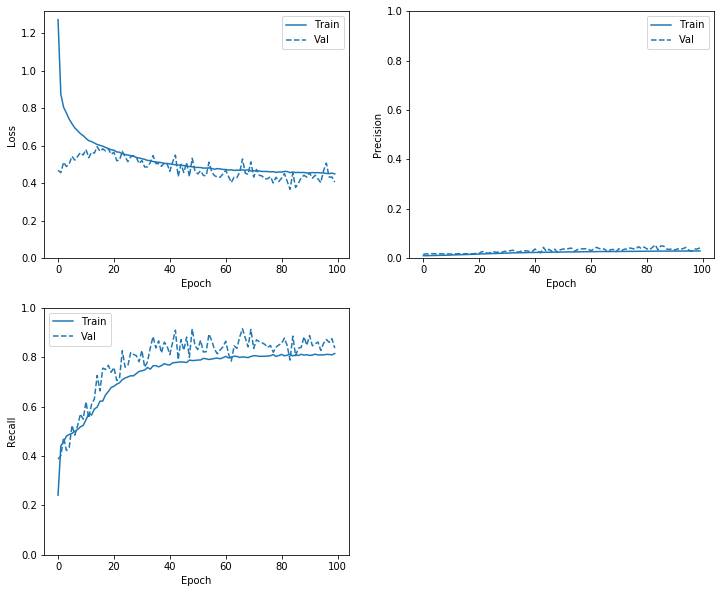

In [64]:
plot_metrics(weighted_history)

In [65]:
train_predictions_weighted = weighted_model.predict(train_features, batch_size=BATCH_SIZE)
test_predictions_weighted = weighted_model.predict(test_features, batch_size=BATCH_SIZE)

loss :  0.40773442965665024
tp :  2321.0
fp :  54436.0
tn :  328818.0
fn :  412.0
accuracy :  0.85790193
precision :  0.040893633
recall :  0.8492499

Legitimate Transactions Detected (True Negatives):  328818
Legitimate Transactions Incorrectly Detected (False Positives):  54436
Fraudulent Transactions Missed (False Negatives):  412
Fraudulent Transactions Detected (True Positives):  2321
Total Fraudulent Transactions:  2733


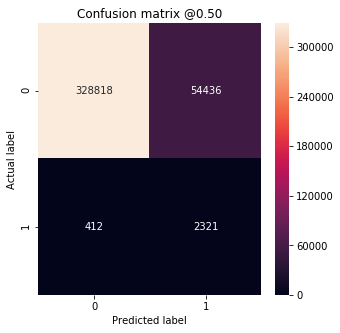

In [66]:
weighted_results = weighted_model.evaluate(test_features, test_labels,
                                           batch_size=BATCH_SIZE, verbose=0)
for name, value in zip(weighted_model.metrics_names, weighted_results):
  print(name, ': ', value)
print()

plot_cm(test_labels, test_predictions_weighted)

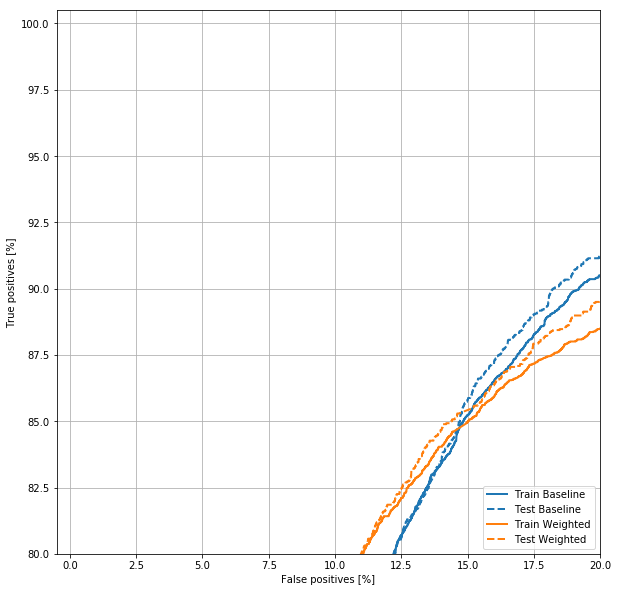

In [67]:
plot_roc("Train Baseline", train_labels, train_predictions_baseline, color=colors[0])
plot_roc("Test Baseline", test_labels, test_predictions_baseline, color=colors[0], linestyle='--')

plot_roc("Train Weighted", train_labels, train_predictions_weighted, color=colors[1])
plot_roc("Test Weighted", test_labels, test_predictions_weighted, color=colors[1], linestyle='--')


plt.legend(loc='lower right')

### Oversample the minority class

In [68]:
pos_features = train_features[bool_train_labels]
neg_features = train_features[~bool_train_labels]

pos_labels = train_labels[bool_train_labels]
neg_labels = train_labels[~bool_train_labels]

In [69]:
ids = np.arange(len(pos_features))
choices = np.random.choice(ids, len(neg_features))

res_pos_features = pos_features[choices]
res_pos_labels = pos_labels[choices]

res_pos_features.shape

(1226187, 21)

In [70]:
resampled_features = np.concatenate([res_pos_features, neg_features], axis=0)
resampled_labels = np.concatenate([res_pos_labels, neg_labels], axis=0)

order = np.arange(len(resampled_labels))
np.random.shuffle(order)
resampled_features = resampled_features[order]
resampled_labels = resampled_labels[order]

resampled_features.shape

(2452374, 21)

In [71]:
BUFFER_SIZE = 100000

def make_ds(features, labels):
  ds = tf.data.Dataset.from_tensor_slices((features, labels))#.cache()
  ds = ds.shuffle(BUFFER_SIZE).repeat()
  return ds

pos_ds = make_ds(pos_features, pos_labels)
neg_ds = make_ds(neg_features, neg_labels)

In [73]:
#for features, label in pos_ds.take(1):
#  print("Features:\n", features.numpy())
#  print()
#  print("Label: ", label.numpy())

In [74]:
resampled_ds = tf.data.experimental.sample_from_datasets([pos_ds, neg_ds], weights=[0.5, 0.5])
resampled_ds = resampled_ds.batch(BATCH_SIZE).prefetch(2)

In [76]:
resampled_steps_per_epoch = np.ceil(2.0*neg/BATCH_SIZE)
resampled_steps_per_epoch

1872.0

### Train on the oversampled data

In [ ]:
resampled_model = make_model()
resampled_model.load_weights(initial_weights)

# Reset the bias to zero, since this dataset is balanced.
output_layer = resampled_model.layers[-1] 
output_layer.bias.assign([0])

val_ds = tf.data.Dataset.from_tensor_slices((val_features, val_labels)).cache()
val_ds = val_ds.batch(BATCH_SIZE).prefetch(2) 

resampled_history = resampled_model.fit(
    resampled_ds,
    epochs=EPOCHS,
    steps_per_epoch=resampled_steps_per_epoch,
    callbacks = [early_stopping],
    validation_data=(val_ds))

In [82]:
resampled_model = make_model()
resampled_model.load_weights(initial_weights)

# Reset the bias to zero, since this dataset is balanced.
output_layer = resampled_model.layers[-1] 
output_layer.bias.assign([0])

resampled_history = resampled_model.fit(
    resampled_ds,
    # These are not real epochs
    steps_per_epoch = 20,
    epochs=10*EPOCHS,
    callbacks = [early_stopping],
    validation_data=(val_ds))

Epoch 1/1000
19/20 [===========================>..] - ETA: 0s - loss: 2.1305 - tp: 175.0000 - fp: 121.0000 - tn: 19408.0000 - fn: 19208.0000 - accuracy: 0.5033 - precision: 0.5912 - recall: 0.0090

ValueError: When using data tensors as input to a model, you should specify the `steps_per_epoch` argument.